In [11]:
!git clone https://github.com/jn-aman/Sign-Language-Digit-Detection

fatal: destination path 'Sign-Language-Digit-Detection' already exists and is not an empty directory.


In [23]:
!dir Sign-Language-Digit-Detection/Sign-language-digits-dataset

README.md  X.npy  Y.npy


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
import random
import os
from sklearn.model_selection import train_test_split

In [0]:
np.random.seed(0)

In [24]:
print(os.listdir("Sign-Language-Digit-Detection/Sign-language-digits-dataset"))

['README.md', 'X.npy', 'Y.npy']


In [0]:
x = np.load('Sign-Language-Digit-Detection/Sign-language-digits-dataset/X.npy')
y = np.load('Sign-Language-Digit-Detection/Sign-language-digits-dataset/Y.npy')

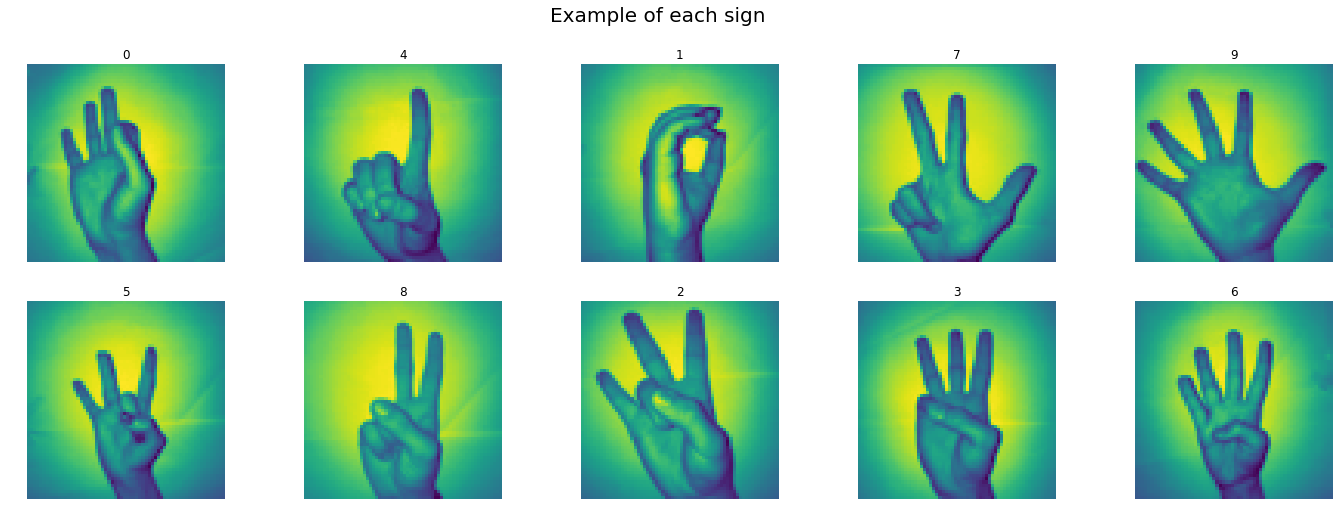

In [148]:

plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(y[0].argmax())
plt.imshow(x[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(y[1000].argmax())
plt.imshow(x[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(y[222].argmax())
plt.imshow(x[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(y[1500].argmax())
plt.imshow(x[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(y[2000].argmax())
plt.imshow(x[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(y[1200].argmax())
plt.imshow(x[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(y[1700].argmax())
plt.imshow(x[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(y[500].argmax())
plt.imshow(x[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(y[700].argmax())
plt.imshow(x[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(y[1400].argmax())
plt.imshow(x[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

In [50]:
print(type(x))

<class 'numpy.ndarray'>


In [51]:
print(x.shape)
print(y.shape)


(2062, 64, 64)
(2062, 10)


In [0]:
x = np.expand_dims(x, axis=3)


In [150]:
print(x.shape)
print(y.shape)


(2062, 64, 64, 1)
(2062, 10)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [0]:
assert(x_train.shape[0] == y_train.shape[0]), "Number of images is not equal to no of labels"
assert(x_val.shape[0] == y_val.shape[0]), "Number of images is not equal to no of labels"
assert(x_test.shape[0] == y_test.shape[0]), "Number of images is not equal to no of labels"
assert(x_train.shape[1:] == (64,64,1)), "Shape of training data is not 64*64*1"
assert(x_val.shape[1:] == (64,64,1)), "Shape of valitation data is not 64*64*1"
assert(x_test.shape[1:] == (64,64,1)), "Shape of test data is not 64*64*1"

In [0]:
classname=["1","2","3","4","5",'6','7','8','9','10']
number = [1, 2, 3, 4, 5, 6, 7,8,9,10] 


In [0]:
data = pd.DataFrame(list(zip(number, classname)),  columns =['ClassId', 'SignName']) 

In [133]:
data

,ClassId,SignName
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [73]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [0]:
# y_notone=(np.argmax(y, axis=1)+1).reshape(-1, 1).ravel()
# y_train_not=(np.argmax(y_train, axis=1)+1).reshape(-1, 1).ravel()
# y_test_not=(np.argmax(y_test, axis=1)+1).reshape(-1, 1).ravel()
# y_val_not=(np.argmax(y_val, axis=1)+1).reshape(-1, 1).ravel()


In [0]:
import collections, numpy
a = (np.argmax(y_train, axis=1)+1).reshape(-1, 1)
a=a.ravel()
EachClassCount=collections.Counter(a)



In [128]:
EachClassCount

Counter({1: 124,
         2: 127,
         3: 140,
         4: 135,
         5: 133,
         6: 130,
         7: 136,
         8: 125,
         9: 128,
         10: 141})

In [0]:
num_of_samples = []
num_classes = 10
for i in range(1,11):
  num_of_samples.append(EachClassCount[i])

[124, 127, 140, 135, 133, 130, 136, 125, 128, 141]


[]

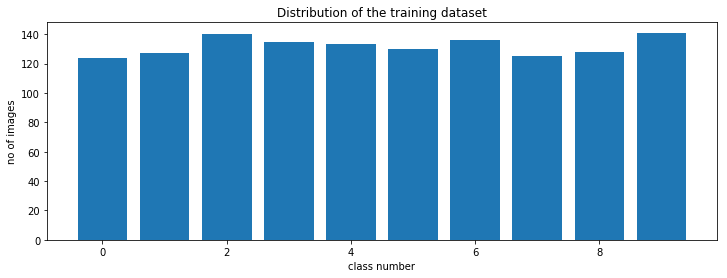

In [137]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("class number")
plt.ylabel("no of images")
plt.plot()

In [0]:
import cv2 


In [0]:
img = x_train[10]



In [162]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(1319, 64, 64, 1)
(1319, 10)
(413, 64, 64, 1)
(413, 10)


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen  = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)
datagen.fit(x_train)

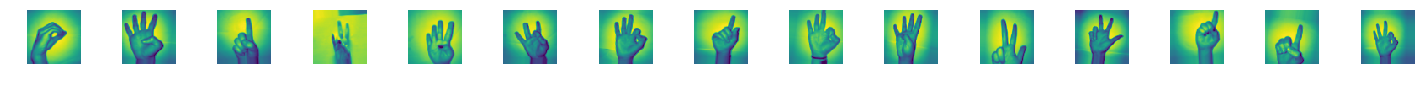

In [165]:
batches = datagen.flow(x_train, y_train, batch_size = 20)
x_batch, y_batch = next(batches)
fig, axs = plt.subplots(1, 15, figsize = (20,5))
fig.tight_layout()
for i in range(15):
  axs[i].imshow(x_batch[i].reshape(64,64))
  axs[i].axis("off")

In [167]:
x_train.shape

(1319, 64, 64, 1)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [0]:
def model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    

    # fully connected
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


    model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [245]:
model = model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [250]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 200, epochs = 10, validation_data = (x_val,y_val), shuffle = 1)





Epoch 1/10
200/200 [==============================] - 9s 43ms/step - loss: 2.3034 - acc: 0.0960 - val_loss: 2.3050 - val_acc: 0.0788
Epoch 2/10
200/200 [==============================] - 7s 36ms/step - loss: 1.6472 - acc: 0.3957 - val_loss: 0.4814 - val_acc: 0.8970
Epoch 3/10
200/200 [==============================] - 7s 36ms/step - loss: 0.6468 - acc: 0.7793 - val_loss: 0.2020 - val_acc: 0.9424
Epoch 4/10
200/200 [==============================] - 7s 36ms/step - loss: 0.3992 - acc: 0.8675 - val_loss: 0.1326 - val_acc: 0.9606
Epoch 5/10
200/200 [==============================] - 7s 36ms/step - loss: 0.2873 - acc: 0.9033 - val_loss: 0.1000 - val_acc: 0.9758
Epoch 6/10
200/200 [==============================] - 7s 36ms/step - loss: 0.2266 - acc: 0.9248 - val_loss: 0.0686 - val_acc: 0.9879
Epoch 7/10
200/200 [==============================] - 7s 36ms/step - loss: 0.1789 - acc: 0.9406 - val_loss: 0.0568 - val_acc: 0.9909
Epoch 8/10
200/200 [==============================] - 7s 37ms/step - 

In [0]:
model.save('trained_model_4.h5')

In [0]:
from google.colab import files
files.download('trained_model_4.h5')

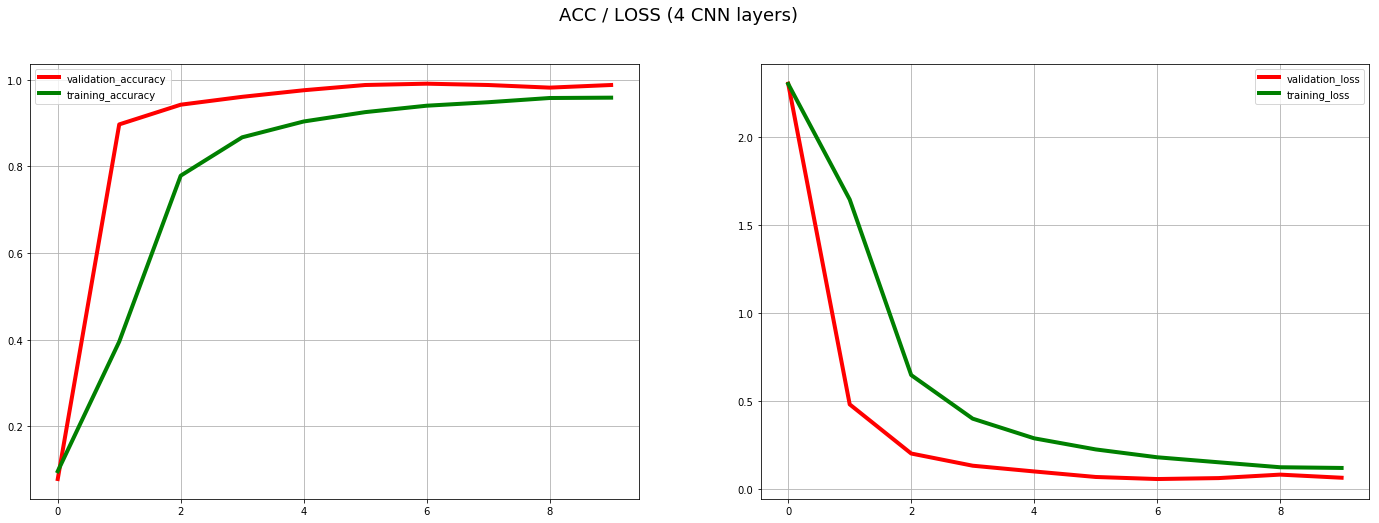

In [270]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS (4 CNN layers)",fontsize=18)

plt.show()


In [254]:
print('Train accuracy of the model: ',history.history['acc'][-1])
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_acc'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])


Train accuracy of the model:  0.9586751420506207
Train loss of the model:  0.11986062475270515
Validation accuracy of the model:  0.9878787940198724
Validation loss of the model:  0.06420017506532145


In [255]:
score4 = model.evaluate(x_test, y_test, verbose = 0)

print("Test loss:", score4[0])
print("Test Accuracy:", score4[1])


Test loss: 0.09413250483748374
Test Accuracy: 0.9878934624697336


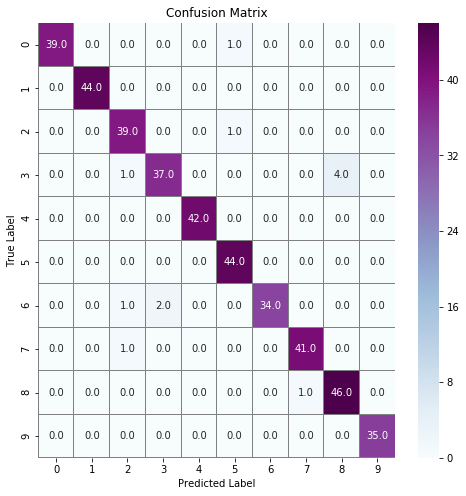

In [308]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
############################4 layer end################################


In [223]:
############################2 layer begins################################



[0.1072810804403723, 0.9782082340330535]

In [0]:
def model2():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    
# model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    

    # fully connected
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


    model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [261]:
model2 = model2()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 8, 8, 32)          0         
__________

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [263]:
history2 = model2.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 200, epochs = 10, validation_data = (x_val,y_val), shuffle = 1)


Epoch 1/10
200/200 [==============================] - 8s 41ms/step - loss: 2.0193 - acc: 0.2545 - val_loss: 1.1116 - val_acc: 0.7545
Epoch 2/10
200/200 [==============================] - 7s 34ms/step - loss: 1.0137 - acc: 0.6472 - val_loss: 0.5645 - val_acc: 0.9212
Epoch 3/10
200/200 [==============================] - 7s 34ms/step - loss: 0.6609 - acc: 0.7696 - val_loss: 0.3748 - val_acc: 0.9273
Epoch 4/10
200/200 [==============================] - 7s 34ms/step - loss: 0.4754 - acc: 0.8395 - val_loss: 0.2950 - val_acc: 0.9242
Epoch 5/10
200/200 [==============================] - 7s 35ms/step - loss: 0.3850 - acc: 0.8666 - val_loss: 0.2055 - val_acc: 0.9515
Epoch 6/10
200/200 [==============================] - 7s 34ms/step - loss: 0.3395 - acc: 0.8859 - val_loss: 0.2002 - val_acc: 0.9667
Epoch 7/10
200/200 [==============================] - 7s 35ms/step - loss: 0.3093 - acc: 0.8933 - val_loss: 0.1494 - val_acc: 0.9667
Epoch 8/10
200/200 [==============================] - 7s 35ms/step - 

In [0]:
model2.save('trained_model_2.h5')

In [0]:
from google.colab import files
files.download('trained_model_2.h5')

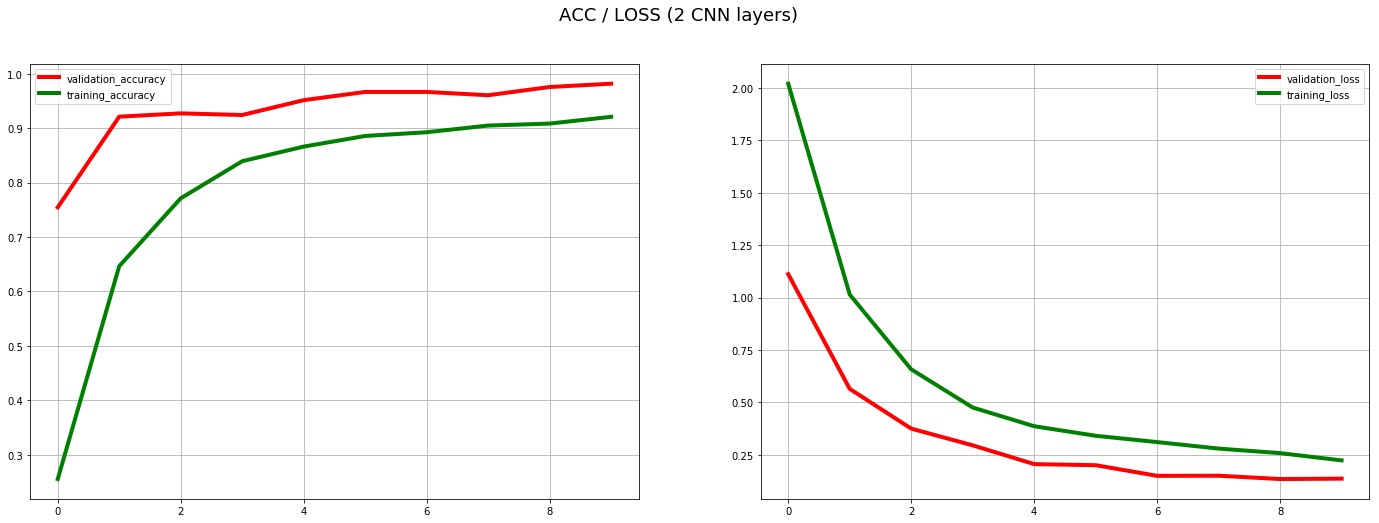

In [271]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history2.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history2.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history2.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history2.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS (2 CNN layers)",fontsize=18)

plt.show()


In [0]:
print('Train accuracy of the model: ',history2.history['acc'][-1])
print('Train loss of the model: ',history2.history['loss'][-1])
print('Validation accuracy of the model: ',history2.history['val_acc'][-1])
print('Validation loss of the model: ',history2.history['val_loss'][-1])


In [273]:
score2 = model2.evaluate(x_test, y_test, verbose = 0)

print("Test loss:", score2[0])
print("Test Accuracy:", score2[1])


Test loss: 0.1581250706250096
Test Accuracy: 0.9806295399515739


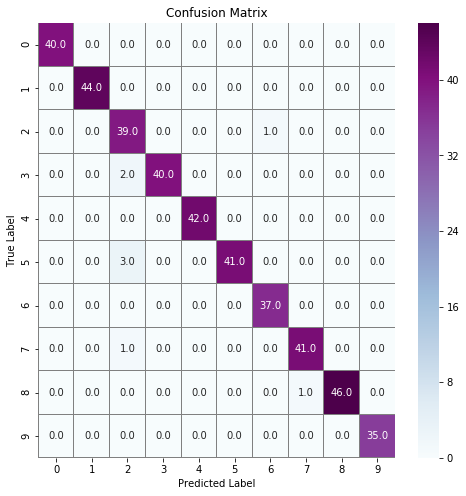

In [309]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
############################2 layer end################################


In [0]:
############################1 layer begins################################


In [0]:
def model1():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    
# model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

#     model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    

    # fully connected
    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))
    optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)


    model.compile(optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model


In [275]:
model1 = model1()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 64, 64, 32)        832       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 8, 8, 32)          0         
__________

In [276]:
history1 = model1.fit_generator(datagen.flow(x_train, y_train, batch_size = 50), steps_per_epoch = 200, epochs = 10, validation_data = (x_val,y_val), shuffle = 1)


Epoch 1/10
200/200 [==============================] - 8s 42ms/step - loss: 2.1505 - acc: 0.2083 - val_loss: 1.7634 - val_acc: 0.5242
Epoch 2/10
200/200 [==============================] - 7s 34ms/step - loss: 1.4811 - acc: 0.4744 - val_loss: 1.1222 - val_acc: 0.7333
Epoch 3/10
200/200 [==============================] - 7s 36ms/step - loss: 1.1945 - acc: 0.5770 - val_loss: 0.9017 - val_acc: 0.7697
Epoch 4/10
200/200 [==============================] - 7s 35ms/step - loss: 1.0538 - acc: 0.6220 - val_loss: 0.7830 - val_acc: 0.8303
Epoch 5/10
200/200 [==============================] - 7s 35ms/step - loss: 0.9574 - acc: 0.6561 - val_loss: 0.7401 - val_acc: 0.8424
Epoch 6/10
200/200 [==============================] - 7s 35ms/step - loss: 0.8828 - acc: 0.6823 - val_loss: 0.6282 - val_acc: 0.8303
Epoch 7/10
200/200 [==============================] - 7s 35ms/step - loss: 0.8175 - acc: 0.7037 - val_loss: 0.5864 - val_acc: 0.8758
Epoch 8/10
200/200 [==============================] - 7s 35ms/step - 

In [0]:
model1.save('trained_model_1.h5')
from google.colab import files
files.download('trained_model_1.h5')

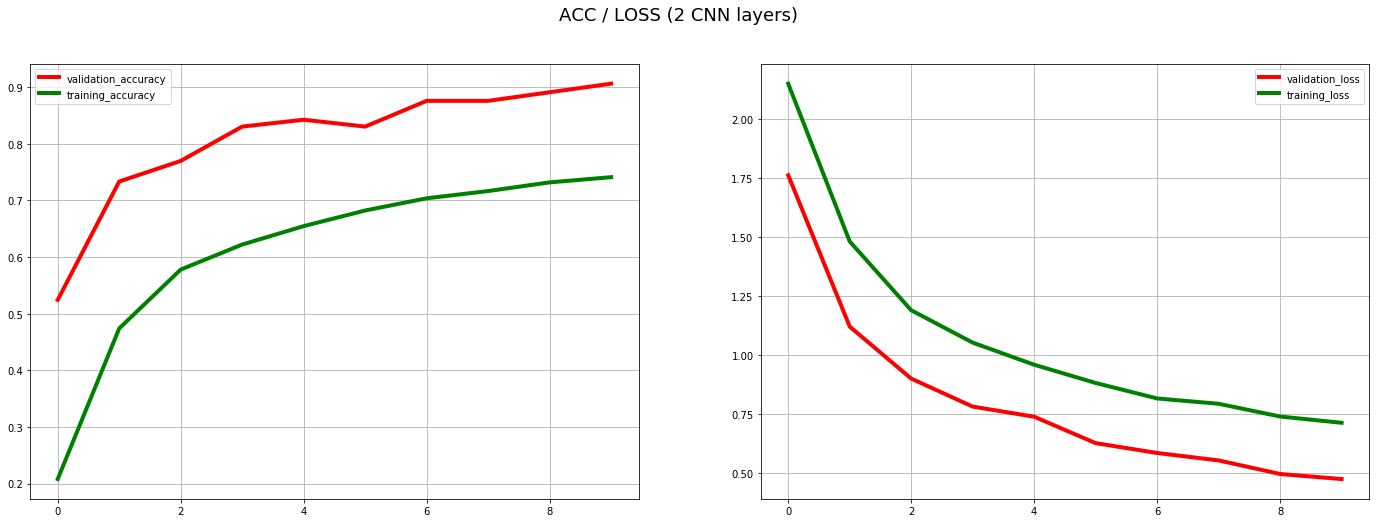

In [278]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history1.history["val_acc"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history1.history["acc"],label="training_accuracy",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history1.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history1.history["loss"],label="training_loss",c="green",linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS (2 CNN layers)",fontsize=18)

plt.show()


In [279]:
print('Train accuracy of the model: ',history1.history['acc'][-1])
print('Train loss of the model: ',history1.history['loss'][-1])
print('Validation accuracy of the model: ',history1.history['val_acc'][-1])
print('Validation loss of the model: ',history1.history['val_loss'][-1])


Train accuracy of the model:  0.7409762105338391
Train loss of the model:  0.7144139169900998
Validation accuracy of the model:  0.9060605945009174
Validation loss of the model:  0.47600891824924585


In [284]:
score1 = model1.evaluate(x_test, y_test, verbose = 0)

print("Test loss:", score1[0])
print("Test Accuracy:", score1[1])

Test loss: 0.5083722695888676
Test Accuracy: 0.8861985490916716


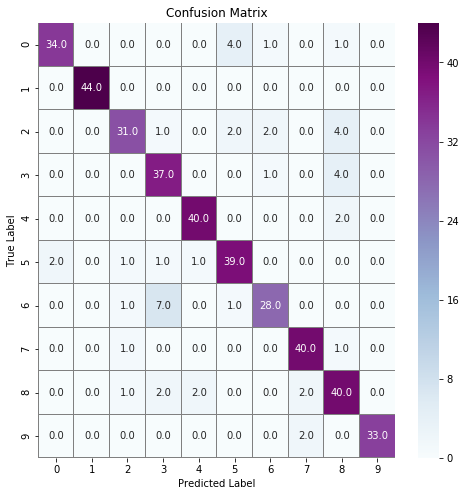

In [311]:
from sklearn.metrics import confusion_matrix

# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model1.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [0]:
############################1 layer ends################################


In [0]:
#compare

In [0]:
label=["4 Layer CNN","2 Layer CNN","1 Layer CNN"]

In [0]:
Train_accuracy_of_the_model=[]
Train_loss_of_the_model=[]
Validation_accuracy_of_the_model=[]
Validation_loss_of_the_model=[]
Test_accuracy_of_the_model=[]
Test_loss_of_the_model=[]


In [0]:
Train_accuracy_of_the_model.append(history.history['acc'][-1])
Train_loss_of_the_model.append(history.history['loss'][-1])
Validation_accuracy_of_the_model.append(history.history['val_acc'][-1])
Validation_loss_of_the_model.append(history.history['val_loss'][-1])
Test_accuracy_of_the_model.append(score4[1])
Test_loss_of_the_model.append(score4[0])


In [0]:
Train_accuracy_of_the_model.append(history2.history['acc'][-1])
Train_loss_of_the_model.append(history2.history['loss'][-1])
Validation_accuracy_of_the_model.append(history2.history['val_acc'][-1])
Validation_loss_of_the_model.append(history2.history['val_loss'][-1])
Test_accuracy_of_the_model.append(score2[1])
Test_loss_of_the_model.append(score2[0])

In [0]:
Train_accuracy_of_the_model.append(history1.history['acc'][-1])
Train_loss_of_the_model.append(history1.history['loss'][-1])
Validation_accuracy_of_the_model.append(history1.history['val_acc'][-1])
Validation_loss_of_the_model.append(history1.history['val_loss'][-1])
Test_accuracy_of_the_model.append(score1[1])
Test_loss_of_the_model.append(score1[0])

In [306]:
Test_accuracy_of_the_model

[0.9878934624697336, 0.9806295399515739, 0.8861985490916716]

In [0]:
def autolabel1(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%f' % float(height),rotation=45,
                ha='center', va='bottom',color='b')
def autolabel2(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%f' % float(height),rotation=45,
                ha='center', va='bottom',color='r')


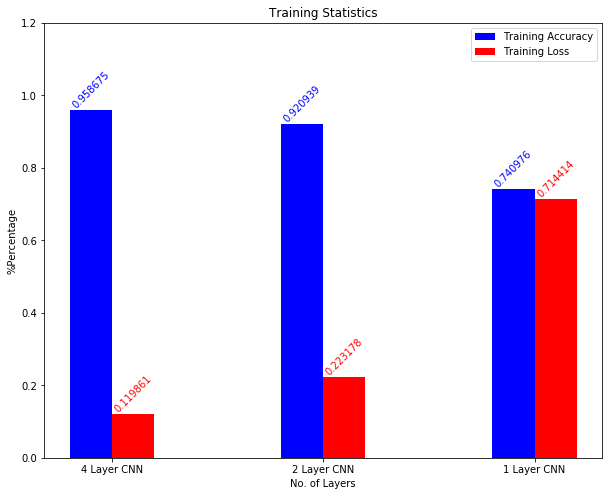

<Figure size 14400x7200 with 0 Axes>

In [409]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# data to plot
n_groups = 3
means_frank = Train_accuracy_of_the_model
means_guido = Train_loss_of_the_model

# create plot
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.20
opacity = 1


plt.ylim([0,1.2])


rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Training Accuracy',edgecolor='')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Training Loss',edgecolor='')

plt.xlabel('No. of Layers')
plt.ylabel('%Percentage')
plt.title('Training Statistics')
plt.xticks(index + bar_width/2, ('4 Layer CNN', '2 Layer CNN', '1 Layer CNN'))
plt.legend()
plt.figure(figsize=(200,100)) 

autolabel1(rects1)
autolabel2(rects2)

plt.show()

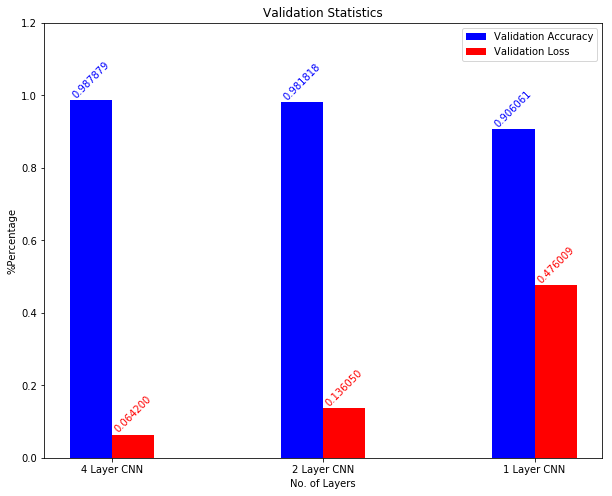

<Figure size 14400x7200 with 0 Axes>

In [410]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# data to plot
n_groups = 3
means_frank = Validation_accuracy_of_the_model
means_guido = Validation_loss_of_the_model

# create plot
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.20
opacity = 1


plt.ylim([0,1.2])


rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Validation Accuracy',edgecolor='')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Validation Loss',edgecolor='')

plt.xlabel('No. of Layers')
plt.ylabel('%Percentage')
plt.title('Validation Statistics')
plt.xticks(index + bar_width/2, ('4 Layer CNN', '2 Layer CNN', '1 Layer CNN'))
plt.legend()
plt.figure(figsize=(200,100)) 

autolabel1(rects1)
autolabel2(rects2)

plt.show()

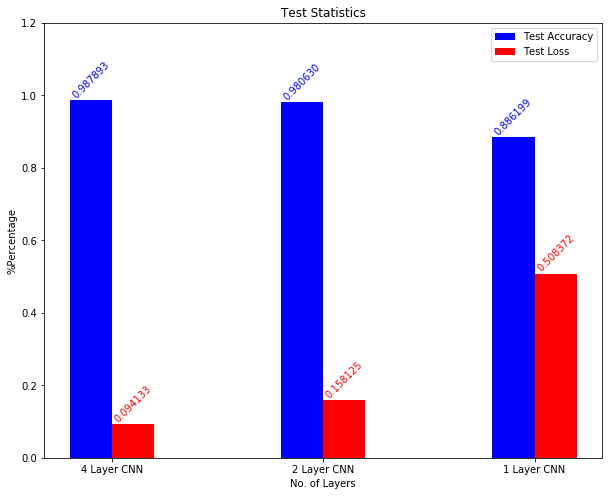

<Figure size 14400x7200 with 0 Axes>

In [413]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# data to plot
n_groups = 3
means_frank = Test_accuracy_of_the_model
means_guido = Test_loss_of_the_model

# create plot
fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.20
opacity = 1


plt.ylim([0,1.2])


rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Test Accuracy',edgecolor='')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='r',
label='Test Loss',edgecolor='')

plt.xlabel('No. of Layers')
plt.ylabel('%Percentage')
plt.title('Test Statistics')
plt.xticks(index + bar_width/2, ('4 Layer CNN', '2 Layer CNN', '1 Layer CNN'))
plt.legend()
plt.figure(figsize=(200,100)) 

autolabel1(rects1)
autolabel2(rects2)

plt.show()

In [0]:
#After fine tuning model,we can see that we have avoided the problem of overfitting as validation loss is less than training loss, and our validation accuracy is more than training accuracy

TESTING THE MODEL WITH REAL IMAGES

In [0]:
from keras.models import load_model
model = load_model('trained_model_4.h5')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pickle
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pandas as pd
import random

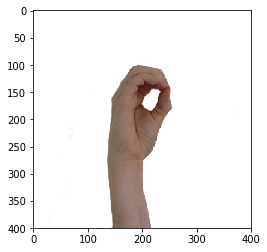

In [508]:
import requests
from PIL import Image


url = 'https://images2.pics4learning.com/catalog/0/0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img


In [0]:

def preprocessing(img):

    img = grayscale(img)
    
#     img = equalize(img)
#     img = img/255 #normalizing the input
    return img



(64, 64)


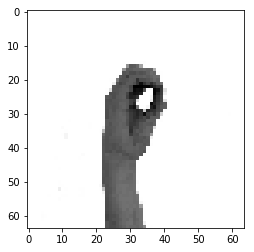

In [511]:
import cv2
img = np.asarray(img)
img = cv2.resize(img, (64, 64))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 

In [512]:
img = img.reshape(1, 64, 64, 1)

model.predict_classes(img)[0]

1

In [0]:
!pip install --upgrade pyttsx3

In [0]:
!apt-get -qq install -y espeak

Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 130812 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1) ...
Selecting previously unselected package libsonic0:amd64.
Preparing to unpack .../libsonic0_0.2.0-6_amd64.deb ...
Unpacking libsonic0:amd64 (0.2.0-6) ...
Selecting previously unselected package espeak-data:amd64.
Preparing to unpack .../espeak-data_1.48.04+dfsg-5_amd64.deb ...
Unpacking espeak-data:amd64 (1.48.04+dfsg-5) ...
Selecting previously unselected package libespeak1:amd64.
Preparing to unpack .../libespeak1_1.48.04+dfsg-5_amd64.deb ...
Unpacking libespeak1:amd64 (1.48.04+dfsg-5) ...
Selecting previously unselected package espeak.
Preparing to unpack .../espeak_1.48.04+dfsg-5_amd64.deb ...
Unpacking espeak (1.48.04+dfsg-5) ...
Setting up libportaudio2:amd64 (19.6.0-1) ...
Setting up espeak-data:amd64 (1.48.04+dfsg-5) ...
Setting up libsonic0:a